<a href="https://colab.research.google.com/github/bohdin/DCGAN/blob/generator/generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def make_generator():
    model = tf.keras.Sequential()

    model.add(layers.Dense(4 * 4 * 256, input_shape=(100,)))
    model.add(layers.Reshape((4, 4, 256)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2DTranspose(128, kernel_size=5, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2DTranspose(3, kernel_size=5, strides=2, padding='same', activation='tanh'))

    return model

In [7]:
generator = make_generator()
# generator.summary()

In [ ]:
# Loss function
def generator_loss(fake_output):
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
#Optimizer for generator
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

In [ ]:
noise = np.random.normal(0, 1, (1, 100))

generated_image = generator.predict(noise)


1/1 [==============================] - 1s 1s/step


In [ ]:
def plot_image(image):
    plt.imshow((image * 127.5 + 127.5).astype(np.uint8))
    plt.axis('off')
    plt.show()

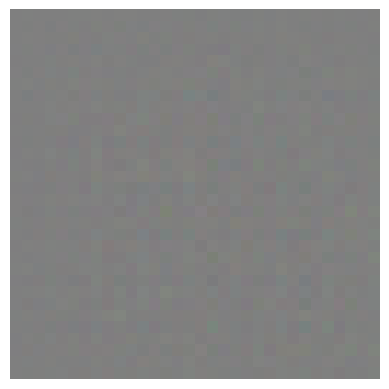

In [ ]:
plot_image(generated_image[0])
